In [2]:
#데이터 구성
import pandas as pd

#행렬 연산
import numpy as np

#데이터 시각화
import matplotlib; import matplotlib.pyplot as plt

#데이터 시각화 산점도 행렬, 추세
import seaborn as sns

#scale 변환 평균 표준편차 기준
from sklearn.preprocessing import StandardScaler

#주성분 분석
from sklearn.decomposition import PCA

#회귀 분석
import statsmodels.api as sm

#폰트적용
matplotlib.rc('font', family="NanumBarunGothic")

In [4]:
#파일 불러오기
df_raw=pd.read_csv('/home/piai/바탕화면/cvs_sales.csv', encoding='euc-kr')
df_raw.head()

UnicodeDecodeError: 'euc_kr' codec can't decode byte 0xaf in position 35619: illegal multibyte sequence

In [4]:
#데이터 분리 X,Y > 설명변수를 이용해 주성분을 분석하기 위해
df_raw_x=df_raw.drop('FAT', axis=1)
df_raw_y=df_raw['FAT']
df_raw_x.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [5]:
#변수 이름 저장
x_cols=df_raw_x.columns

#Scale 변환 ndarry 형식
scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)

#변환된 데이터 및 형태 확인
print('Scaled Data: \n {}'.format(nd_scaled[:30].round(3)))
print('Shape: \n {}'.format(nd_scaled.shape))

Scaled Data: 
 [[ 8.900e-02  6.281e+00  5.750e-01  5.444e+00  4.205e+00  5.161e+00
   6.685e+00  5.324e+00  4.366e+00  3.841e+00  4.221e+00  1.670e-01
   3.403e+00]
 [-1.422e+00 -3.720e-01  3.010e-01  4.400e-02 -9.300e-01 -1.250e+00
  -7.560e-01 -4.020e-01 -9.930e-01  8.260e-01 -1.086e+00  6.630e-01
   6.120e-01]
 [ 1.917e+00 -4.000e-02 -4.510e-01  2.920e-01  1.400e-01  2.270e-01
  -2.240e-01 -8.410e-01 -1.210e-01 -7.700e-01 -4.890e-01 -1.470e+00
   6.120e-01]
 [ 9.630e-01 -1.063e+00 -1.203e+00 -1.151e+00 -1.460e-01 -5.720e-01
  -1.371e+00 -1.223e+00 -1.492e+00 -1.066e+00 -1.900e-01 -6.760e-01
  -1.427e+00]
 [ 4.860e-01  1.366e+00 -1.682e+00  1.322e+00  2.255e+00  2.745e+00
   1.804e+00  5.910e-01 -7.020e-01  2.940e-01  8.050e-01  2.160e-01
   1.830e-01]
 [-3.880e-01  7.950e-01 -4.100e-02  2.090e-01  6.750e-01  7.750e-01
   8.800e-01  7.810e-01  5.440e-01 -2.970e-01  9.370e-01  9.600e-01
   8.270e-01]
 [ 5.660e-01 -4.070e-01 -6.560e-01 -2.030e-01  2.230e-01 -1.450e-01
  -1.410e-01 -4.4

In [6]:
#dataframe으로 저장
df_scaled=pd.DataFrame(nd_scaled, columns=x_cols)
df_scaled.head().round(3)

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,0.089,6.281,0.575,5.444,4.205,5.161,6.685,5.324,4.366,3.841,4.221,0.167,3.403
1,-1.422,-0.372,0.301,0.044,-0.930,-1.250,-0.756,-0.402,-0.993,0.826,-1.086,0.663,0.612
2,1.917,-0.040,-0.451,0.292,0.140,0.227,-0.224,-0.841,-0.121,-0.770,-0.489,-1.470,0.612
3,0.963,-1.063,-1.203,-1.151,-0.146,-0.572,-1.371,-1.223,-1.492,-1.066,-0.190,-0.676,-1.427
4,0.486,1.366,-1.682,1.322,2.255,2.745,1.804,0.591,-0.702,0.294,0.805,0.216,0.183


In [11]:
#주성분 분석 주성분1~30까지 생성 및 저장
pca=PCA(n_components=13)
nd_pca=pca.fit_transform(df_scaled)

#생성된 주성분 점수 확인
print("PCA Data: \n {}".format(nd_pca[:13]))
      
#생성된 주성분 점수 row column 개수 확인
print("Shape: \n {}".format(nd_pca.shape))

PCA Data: 
 [[ 1.51407865e+01  7.49180061e-01  1.73038829e+00  2.97562799e+00
  -1.20140416e+00  1.91649244e+00 -5.65465823e-01  6.41639529e-01
  -7.16668464e-01  6.67288487e-01  1.11830608e+00 -3.74402932e-01
  -4.01646380e-01]
 [-1.25745311e+00 -1.79805793e+00 -6.03591475e-01 -4.05941404e-01
   1.33324667e+00  8.22236818e-01  1.74463381e-01 -1.01801483e+00
   3.69261273e-02  3.76706308e-01 -8.75860804e-02 -1.14957740e-01
  -2.18982014e-01]
 [-7.27442052e-01  2.31886158e+00 -8.92096811e-01  6.82580352e-01
  -5.03280467e-01  6.00209382e-01 -5.16400793e-01 -9.56416513e-03
   4.79435580e-02 -2.64350345e-01  1.76015189e-01 -7.71764507e-02
  -1.35788495e-01]
 [-3.21015592e+00  1.46511228e+00  4.57907542e-01 -5.75637151e-01
   1.97721197e-02 -1.78803322e-01  7.16879046e-01  8.43042247e-01
   2.18223478e-01 -2.55255904e-01 -2.38793622e-01 -1.00886784e-01
  -1.22172296e-01]
 [ 3.24650172e+00  2.29304235e+00  1.82833929e+00 -2.33659425e-02
  -4.06978793e-01  1.14656798e+00  1.70117486e+00 -1.0

In [13]:
#주성분 점수 저장
df_pca=pd.DataFrame(nd_pca, columns=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8','Prin9','Prin10',
                                     'Prin11','Prin12','Prin13'])

#주성분 분석용 데이터와 주성분 점수 결합
df_scaled_pca =df_scaled.join(df_pca)
df_scaled_pca.head()

,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,...,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,0.088660,6.280963,0.574790,5.444135,4.204531,5.161290,6.684808,5.323774,4.366207,3.841274,...,2.975628,-1.201404,1.916492,-0.565466,0.641640,-0.716668,0.667288,1.118306,-0.374403,-0.401646
1,-1.422033,-0.372455,0.301235,0.044490,-0.929933,-1.250360,-0.755929,-0.401936,-0.993129,0.826247,...,-0.405941,1.333247,0.822237,0.174463,-1.018015,0.036926,0.376706,-0.087586,-0.114958,-0.218982
2,1.917394,-0.040040,-0.451039,0.291802,0.139747,0.227107,-0.224448,-0.840907,-0.120679,-0.769944,...,0.682580,-0.503280,0.600209,-0.516401,-0.009564,0.047944,-0.264350,0.176015,-0.077176,-0.135788
3,0.963272,-1.062856,-1.203313,-1.150851,-0.145501,-0.572026,-1.371328,-1.222621,-1.491672,-1.065535,...,-0.575637,0.019772,-0.178803,0.716879,0.843042,0.218223,-0.255256,-0.238794,-0.100887,-0.122172
4,0.486211,1.366332,-1.682033,1.322269,2.255336,2.745306,1.803573,0.590521,-0.702312,0.294183,...,-0.023366,-0.406979,1.146568,1.701175,-0.101494,0.539822,0.304860,0.468418,0.275033,0.090397


In [14]:
#주성분 분석 통계량 저장: 주성분 번호,eigenvalue, eigenvalue ratio
df_pca_stat=pd.DataFrame()
df_pca_stat['PrinNo'] = [i for i in range(1,14)]
df_pca_stat['EigenValues']= pca.explained_variance_
df_pca_stat['EigenValueRatio']=pca.explained_variance_ratio_
df_pca_stat['CumEigenValueRatio']= np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,8.072,0.618,0.618
1,2,1.360,0.104,0.723
2,3,1.006,0.077,0.800
3,4,0.670,0.051,0.851
4,5,0.601,0.046,0.897
5,6,0.315,0.024,0.921
6,7,0.287,0.022,0.943
7,8,0.262,0.020,0.963
8,9,0.184,0.014,0.978
9,10,0.135,0.010,0.988


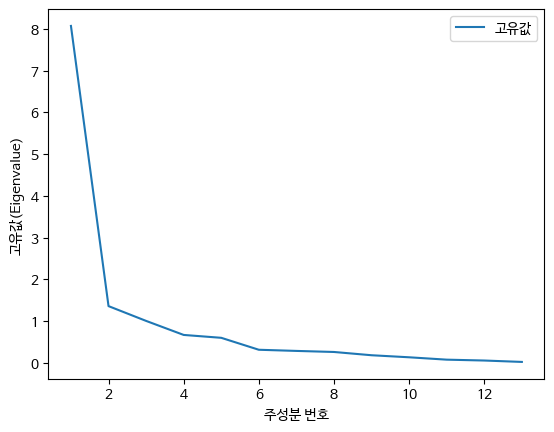

In [15]:
#screen plot
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label='고유값')

#그래프 label과 legend 설정
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

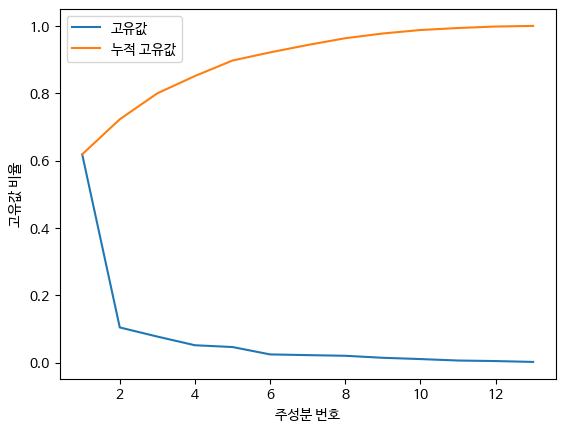

In [16]:
#고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValueRatio'], label='고유값')

#누적된 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValueRatio'], label='누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc='best')

In [20]:
#주성분 분석 데이터의 변수 이름
x_cols=pd.DataFrame({'Feature': df_raw_x.columns})

#주성분 Prin1~6까지의 고유벡터 저장
df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_[:13].T * -1,
                            columns =['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8','Prin9','Prin10',
                                     'Prin11','Prin12','Prin13'])], axis=1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6,Prin7,Prin8,Prin9,Prin10,Prin11,Prin12,Prin13
0,AGE,-0.010,-0.751,0.420,-0.079,-0.040,0.294,0.034,-0.207,0.152,-0.262,0.031,0.166,0.041
1,WEIGHT,-0.345,0.018,-0.039,-0.087,0.142,-0.031,-0.076,0.047,-0.061,0.019,-0.206,0.190,0.872
2,HEIGHT,-0.101,0.469,0.678,-0.082,0.485,0.115,-0.134,-0.102,-0.005,-0.124,0.062,-0.008,-0.090
3,NECK,-0.306,-0.090,0.121,0.206,0.055,-0.561,-0.007,0.115,0.703,0.048,-0.073,-0.013,-0.095
4,CHEST,-0.316,-0.209,-0.061,0.009,0.152,-0.070,-0.450,0.061,-0.248,0.431,0.398,0.409,-0.214
5,ABDOMEN,-0.312,-0.265,-0.122,-0.120,0.229,0.033,-0.295,0.086,-0.140,-0.086,-0.037,-0.791,-0.046
6,HIP,-0.326,-0.003,-0.221,-0.178,0.163,0.045,0.049,0.101,-0.134,-0.323,-0.609,0.343,-0.403
7,THIGH,-0.310,0.123,-0.322,-0.077,0.096,0.062,0.273,-0.041,0.115,-0.522,0.631,0.073,0.018
8,KNEE,-0.308,0.050,0.001,-0.247,0.005,0.497,0.443,0.137,0.272,0.540,-0.013,-0.088,-0.076
9,ANKLE,-0.231,0.224,0.128,-0.500,-0.679,-0.032,-0.347,-0.167,0.106,-0.080,0.011,-0.024,-0.035


In [21]:
#diagnosis을 합친다
data=df_eigenvector.join(df_raw_y)

In [22]:
df_raw_x_const=sm.add_constant(df_raw_x)

reg_model=sm.OLS(df_raw_y,df_raw_x_const)

reg_model=reg_model.fit()

print(reg_model.summary())



                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.72e-64
Time:                        09:50:29   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1885     17.349     -1.048      0.2

In [23]:
x_var=['Prin1','Prin2','Prin3','Prin4','Prin5','Prin6','Prin7','Prin8','Prin9','Prin10',
                                     'Prin11','Prin12','Prin13']

df_pca_const=sm.add_constant(df_pca[x_var])

reg_model=sm.OLS(df_raw_y, df_pca_const)

reg_model=reg_model.fit()

print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     54.65
Date:                Mon, 07 Nov 2022   Prob (F-statistic):           7.72e-64
Time:                        09:50:48   Log-Likelihood:                -718.25
No. Observations:                 252   AIC:                             1465.
Df Residuals:                     238   BIC:                             1514.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.1508      0.271     70.613      0.0